In [ ]:
from pathlib import Path 
import pandas as pd

In [ ]:
!git clone https://github.com/udacity/P1_Facial_Keypoints.git
!cd P1_Facial_Keypoints

fatal: destination path 'P1_Facial_Keypoints' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv('P1_Facial_Keypoints/data/training_frames_keypoints.csv')

In [ ]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,...,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,...,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,...,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,...,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,...,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457,Thomas_Ferguson_02.jpg,35.0,94.0,35.0,105.0,38.0,112.0,40.0,123.0,46.0,...,71.0,123.0,79.0,121.0,71.0,123.0,66.0,126.0,64.0,126.0
3458,Valerie_Harper_00.jpg,72.0,133.0,76.0,147.0,80.0,159.0,87.0,170.0,91.0,...,120.0,156.0,135.0,159.0,124.0,163.0,117.0,167.0,113.0,166.0
3459,Maggie_Smith_00.jpg,52.0,149.0,56.0,160.0,63.0,168.0,71.0,179.0,78.0,...,122.0,169.0,133.0,169.0,122.0,172.0,115.0,172.0,111.0,172.0
3460,Erin_Hershey_Presley_41.jpg,82.0,91.0,82.0,105.0,82.0,116.0,86.0,128.0,90.0,...,119.0,132.0,134.0,136.0,119.0,139.0,112.0,139.0,108.0,139.0


- even columns : x-value
- odd columns : y-value

In [ ]:
1 + 68*2

137

In [ ]:
from torchvision.io import decode_image
import numpy as np 
import matplotlib.pyplot as plt
from copy import deepcopy

In [ ]:
root_dir = 'P1_Facial_Keypoints/data/training/'

136


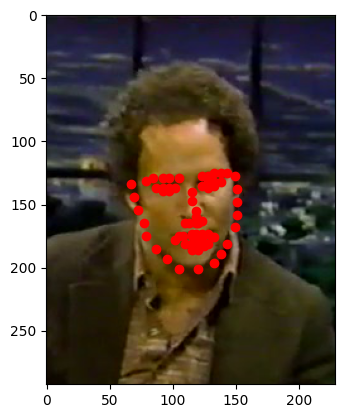

In [ ]:
idx = 5
img_path = root_dir + df.iloc[idx, 0]
img = decode_image(img_path)
c, h, w = img.shape

kp = deepcopy(df.iloc[idx,1:].tolist())
kp_x = np.array(kp[0::2]) / w
kp_y = np.array(kp[1::2]) / h
kp2 = list(kp_x) + list(kp_y)
print(len(kp2))
plt.imshow(img.permute(1, 2, 0))
plt.scatter(kp_x*w, kp_y*h, c='r')
plt.show()

In [ ]:
from torchvision.transforms import v2
import torch

torch.Size([3, 293, 229])
tensor(0, dtype=torch.uint8) tensor(243, dtype=torch.uint8)
tensor(0.) tensor(0.9490)


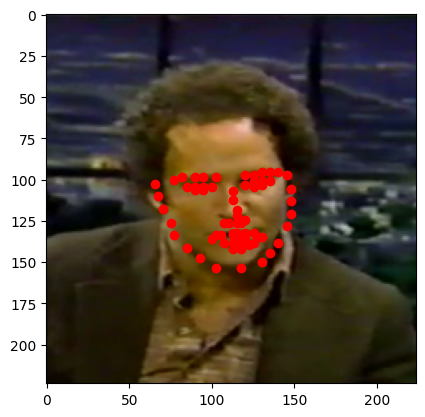

In [ ]:
load_transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((224, 224)),
    v2.ToDtype(torch.float32, scale=True),
    v2.ToPureTensor(),
])

idx = 5
img_path = root_dir + df.iloc[idx, 0]
img = decode_image(img_path)[:3]
print(img.shape)
print(img.min(), img.max())
c, h, w = img.shape

kp = deepcopy(df.iloc[idx,1:].tolist())
kp_x = np.array(kp[0::2]) / w
kp_y = np.array(kp[1::2]) / h

img = load_transform(img)
print(img.min(), img.max())
c, h, w = img.shape

plt.imshow(img.permute(1, 2, 0))
plt.scatter(kp_x*w, kp_y*h, c='r')
plt.show()

In [ ]:
import timm

In [ ]:
model = timm.create_model("vgg16", pretrained=True)

In [ ]:
from torchinfo import summary
summary(model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [ ]:
data_cfg = timm.data.resolve_data_config(model.pretrained_cfg)
transform = timm.data.create_transform(**data_cfg)
transform

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

In [ ]:
import torch
from torch.utils.data import Dataset

In [ ]:
class FacesData(Dataset):
    def __init__(self, df, transform=None):
        super().__init__()
        self.df  = df
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = root_dir + df.iloc[idx, 0]
        img = decode_image(img_path)[:3]
        img = v2.ToDtype(torch.float32, scale=True)(img)
        c, h, w = img.shape
        kp = deepcopy(df.iloc[idx,1:].tolist())
        kp_x = np.array(kp[0::2]) / w
        kp_y = np.array(kp[1::2]) / h
        kp2 = list(kp_x) + list(kp_y)
        kp2 = torch.tensor(np.array(kp2).astype(np.float32))
        if self.transform:
            img = self.transform(img)
        return img, kp2

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

train, test = train_test_split(df, test_size=0.2, random_state=101)
train_dataset = FacesData(train.reset_index(drop=True), transform=transform)
test_dataset = FacesData(test.reset_index(drop=True), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
len(train_dataset), len(test_dataset)

(2769, 693)

In [ ]:
img, kps = next(iter(train_loader))
img.shape, kps.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 136]))

In [ ]:
from tqdm import tqdm

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = timm.create_model("vgg16", pretrained=True, num_classes=136)
for param in model.parameters():
    param.requires_grad = False
for param in model.head.fc.parameters():
    param.requires_grad = True
model.head.flatten = torch.nn.Sigmoid()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model = model.to(device)
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
model(img.to(device)).shape

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4096x1 and 4096x136)

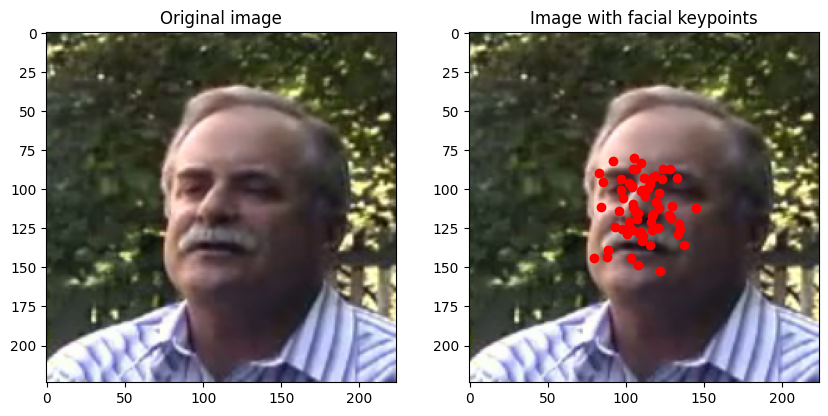

In [ ]:
idx = 3

root_dir = 'P1_Facial_Keypoints/data/training/'
img_path = root_dir + test_dataset.df.iloc[idx, 0]
img = decode_image(img_path)[:3]
img = v2.ToDtype(torch.float32, scale=True)(img)
rimg = v2.Resize((224, 224))(img)
timg = transform(img).unsqueeze(0)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Original image')
plt.imshow(rimg.permute(1, 2, 0))
plt.grid(False)

plt.subplot(222)
plt.title('Image with facial keypoints')
plt.imshow(rimg.permute(1, 2, 0))
kp = model(timg.to(device)).flatten().detach().cpu()
plt.scatter(kp[:68]*224, kp[68:]*224, c='r')
plt.grid(False)
plt.show()

In [ ]:
train_losses, test_losses = [], []
n_epochs = 50

for epoch in range(n_epochs):
    model.train()
    train_epoch_loss = 0
    for img, kps in tqdm(train_loader):
        img, kps = img.to(device), kps.to(device)
        pred_kps = model(img)
        loss = criterion(pred_kps, kps)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_epoch_loss += loss.item()
    train_loss = train_epoch_loss / len(train_loader)
    train_losses.append(train_loss)

    with torch.inference_mode():
        model.eval()
        test_epoch_loss = 0
        for img, kps in tqdm(test_loader):
            img, kps = img.to(device), kps.to(device)
            pred_kps = model(img)
            loss = criterion(pred_kps, kps)
            test_epoch_loss += loss.item()
        test_loss = test_epoch_loss / len(test_loader)
        test_losses.append(test_loss)

    print(f"Epoch {epoch}")
    print(f"Train Loss: {train_loss:.4g}")
    print(f"Test  Loss: {test_loss:.4g}")

100%|██████████| 22/22 [00:04<00:00,  5.04it/s]


Epoch 0
Train Loss: 0.05557
Test  Loss: 0.04731


100%|██████████| 22/22 [00:04<00:00,  4.98it/s]


Epoch 1
Train Loss: 0.04482
Test  Loss: 0.0428


100%|██████████| 22/22 [00:04<00:00,  5.05it/s]


Epoch 2
Train Loss: 0.04131
Test  Loss: 0.03987


100%|██████████| 22/22 [00:04<00:00,  5.05it/s]


Epoch 3
Train Loss: 0.03883
Test  Loss: 0.03773


100%|██████████| 22/22 [00:04<00:00,  4.98it/s]


Epoch 4
Train Loss: 0.03688
Test  Loss: 0.03598


100%|██████████| 22/22 [00:04<00:00,  4.91it/s]


Epoch 5
Train Loss: 0.03529
Test  Loss: 0.0346


100%|██████████| 22/22 [00:04<00:00,  4.95it/s]


Epoch 6
Train Loss: 0.03395
Test  Loss: 0.03329


100%|██████████| 22/22 [00:04<00:00,  4.87it/s]


Epoch 7
Train Loss: 0.03276
Test  Loss: 0.03224


100%|██████████| 22/22 [00:04<00:00,  4.83it/s]


Epoch 8
Train Loss: 0.03175
Test  Loss: 0.03136


100%|██████████| 22/22 [00:04<00:00,  4.93it/s]


Epoch 9
Train Loss: 0.03084
Test  Loss: 0.03052


100%|██████████| 22/22 [00:04<00:00,  4.94it/s]


Epoch 10
Train Loss: 0.03006
Test  Loss: 0.0297


100%|██████████| 22/22 [00:04<00:00,  4.91it/s]


Epoch 11
Train Loss: 0.02935
Test  Loss: 0.029


100%|██████████| 22/22 [00:04<00:00,  5.07it/s]


Epoch 12
Train Loss: 0.02874
Test  Loss: 0.02851


100%|██████████| 22/22 [00:02<00:00,  7.59it/s]


Epoch 13
Train Loss: 0.02819
Test  Loss: 0.02802


100%|██████████| 22/22 [00:04<00:00,  5.23it/s]


Epoch 14
Train Loss: 0.0277
Test  Loss: 0.02743


100%|██████████| 22/22 [00:04<00:00,  5.15it/s]


Epoch 15
Train Loss: 0.02728
Test  Loss: 0.02707


100%|██████████| 22/22 [00:03<00:00,  6.89it/s]


Epoch 16
Train Loss: 0.02694
Test  Loss: 0.02665


100%|██████████| 22/22 [00:04<00:00,  4.70it/s]


Epoch 17
Train Loss: 0.02659
Test  Loss: 0.02643


100%|██████████| 22/22 [00:04<00:00,  4.88it/s]


Epoch 18
Train Loss: 0.02619
Test  Loss: 0.02607


100%|██████████| 22/22 [00:04<00:00,  4.95it/s]


Epoch 19
Train Loss: 0.02588
Test  Loss: 0.02585


100%|██████████| 22/22 [00:04<00:00,  4.78it/s]


Epoch 20
Train Loss: 0.02566
Test  Loss: 0.02554


100%|██████████| 22/22 [00:04<00:00,  4.91it/s]


Epoch 21
Train Loss: 0.02529
Test  Loss: 0.02497


100%|██████████| 22/22 [00:04<00:00,  4.70it/s]


Epoch 22
Train Loss: 0.02493
Test  Loss: 0.02465


100%|██████████| 22/22 [00:03<00:00,  6.64it/s]


Epoch 23
Train Loss: 0.02462
Test  Loss: 0.02422


100%|██████████| 22/22 [00:04<00:00,  4.94it/s]


Epoch 24
Train Loss: 0.02431
Test  Loss: 0.02409


100%|██████████| 22/22 [00:04<00:00,  4.88it/s]


Epoch 25
Train Loss: 0.02408
Test  Loss: 0.02381


100%|██████████| 22/22 [00:03<00:00,  6.46it/s]


Epoch 26
Train Loss: 0.02383
Test  Loss: 0.0234


100%|██████████| 22/22 [00:04<00:00,  4.97it/s]


Epoch 27
Train Loss: 0.0236
Test  Loss: 0.0232


100%|██████████| 22/22 [00:04<00:00,  4.93it/s]


Epoch 28
Train Loss: 0.02332
Test  Loss: 0.02292


100%|██████████| 22/22 [00:04<00:00,  5.05it/s]


Epoch 29
Train Loss: 0.02308
Test  Loss: 0.02292


100%|██████████| 22/22 [00:04<00:00,  5.08it/s]


Epoch 30
Train Loss: 0.02289
Test  Loss: 0.02271


100%|██████████| 22/22 [00:04<00:00,  5.04it/s]


Epoch 31
Train Loss: 0.02273
Test  Loss: 0.02245


100%|██████████| 22/22 [00:04<00:00,  5.02it/s]


Epoch 32
Train Loss: 0.02261
Test  Loss: 0.02219


100%|██████████| 22/22 [00:04<00:00,  5.06it/s]


Epoch 33
Train Loss: 0.02239
Test  Loss: 0.0222


100%|██████████| 22/22 [00:04<00:00,  5.06it/s]


Epoch 34
Train Loss: 0.02228
Test  Loss: 0.02232


100%|██████████| 22/22 [00:04<00:00,  4.82it/s]


Epoch 35
Train Loss: 0.02218
Test  Loss: 0.0227


100%|██████████| 22/22 [00:04<00:00,  4.76it/s]


Epoch 36
Train Loss: 0.02208
Test  Loss: 0.02276


100%|██████████| 22/22 [00:04<00:00,  5.03it/s]


Epoch 37
Train Loss: 0.02195
Test  Loss: 0.02258


100%|██████████| 22/22 [00:04<00:00,  4.80it/s]


Epoch 38
Train Loss: 0.02181
Test  Loss: 0.02256


100%|██████████| 22/22 [00:04<00:00,  4.77it/s]


Epoch 39
Train Loss: 0.02169
Test  Loss: 0.02238


100%|██████████| 22/22 [00:04<00:00,  4.83it/s]


Epoch 40
Train Loss: 0.02149
Test  Loss: 0.02197


100%|██████████| 22/22 [00:04<00:00,  4.61it/s]


Epoch 41
Train Loss: 0.02133
Test  Loss: 0.02204


100%|██████████| 22/22 [00:03<00:00,  6.91it/s]


Epoch 42
Train Loss: 0.02122
Test  Loss: 0.02183


100%|██████████| 22/22 [00:04<00:00,  4.56it/s]


Epoch 43
Train Loss: 0.02096
Test  Loss: 0.02179


100%|██████████| 22/22 [00:04<00:00,  4.95it/s]


Epoch 44
Train Loss: 0.02085
Test  Loss: 0.02162


100%|██████████| 22/22 [00:04<00:00,  4.89it/s]


Epoch 45
Train Loss: 0.02079
Test  Loss: 0.02145


100%|██████████| 22/22 [00:04<00:00,  4.54it/s]


Epoch 46
Train Loss: 0.0206
Test  Loss: 0.02146


100%|██████████| 22/22 [00:04<00:00,  5.11it/s]


Epoch 47
Train Loss: 0.02057
Test  Loss: 0.02136


100%|██████████| 22/22 [00:04<00:00,  5.02it/s]


Epoch 48
Train Loss: 0.02053
Test  Loss: 0.02151


100%|██████████| 22/22 [00:04<00:00,  4.71it/s]

Epoch 49
Train Loss: 0.02036
Test  Loss: 0.02148


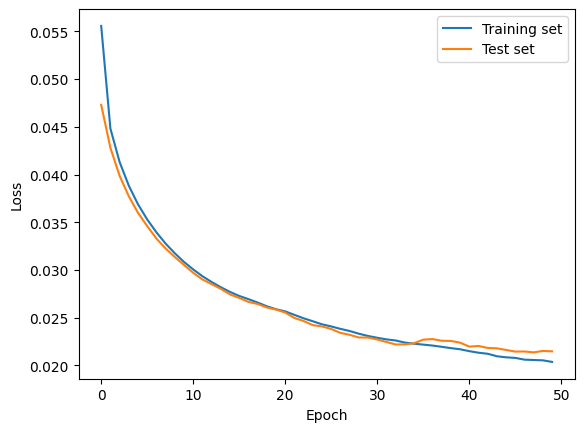

In [ ]:
plt.plot(train_losses, label="Training set")
plt.plot(test_losses, label="Test set")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), 'model.pth')

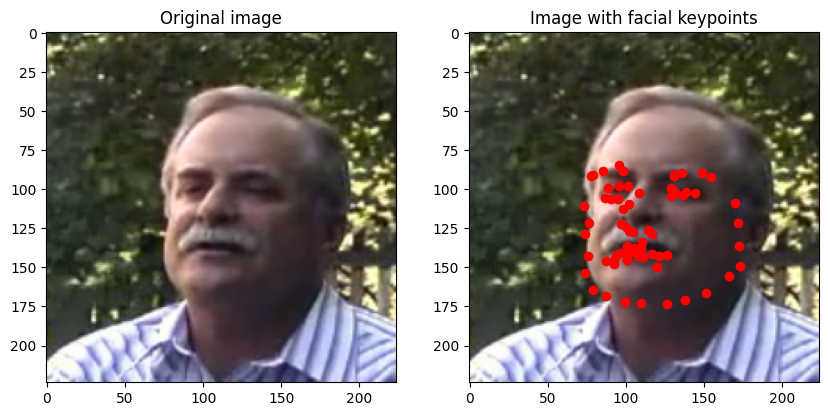

In [ ]:
idx = 3

img_path = root_dir + test_dataset.df.iloc[idx, 0]
img = decode_image(img_path)[:3]
img = v2.ToDtype(torch.float32, scale=True)(img)
rimg = v2.Resize((224, 224))(img)
timg = transform(img).unsqueeze(0)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Original image')
plt.imshow(rimg.permute(1, 2, 0))
plt.grid(False)

plt.subplot(222)
plt.title('Image with facial keypoints')
plt.imshow(rimg.permute(1, 2, 0))
kp = model(timg.to(device)).flatten().detach().cpu()
plt.scatter(kp[:68]*224, kp[68:]*224, c='r')
plt.grid(False)
plt.show()